# Simple Linear Regression(Prediction of Height wrt Weight)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read the dataset
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

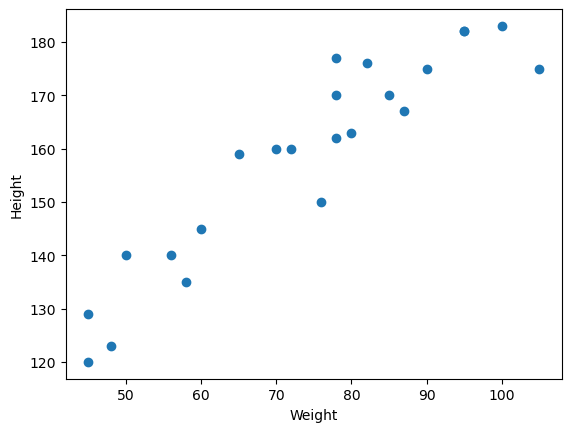

In [3]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [4]:
#divide the dataset into independent and dependent features
X= df[['Weight']]  #independent feature
y=df['Height']   #dependent feature

In [5]:
#Train test split
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [7]:
X.shape

(23, 1)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [9]:
# standardize the dataset Train independent data

from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()

In [18]:
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

/Users/naresh/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


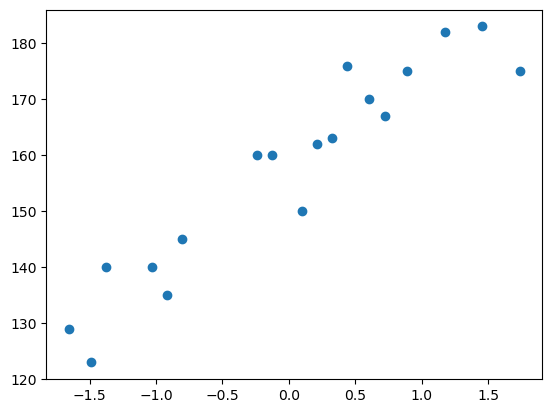

In [21]:
plt.scatter(X_train, y_train)

In [22]:
## Train the Simple Linear Regression Model

from sklearn.linear_model import LinearRegression

In [23]:
regressor=LinearRegression()

In [24]:
regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
print("The slope or coefficient of weight is ",regressor.coef_)
print("Intercett: ", regressor.intercept_)

The slope or coefficient of weight is  [17.03440872]
Intercett:  157.5


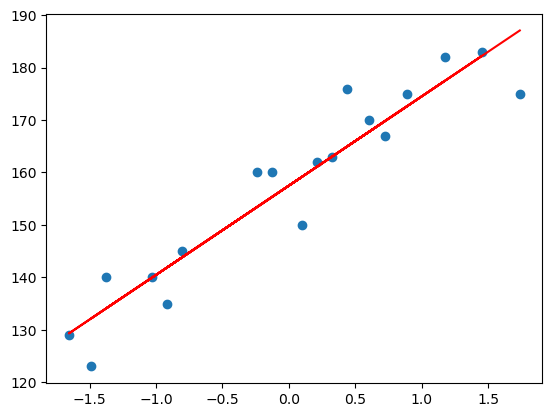

In [30]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color='r')

# prediction of the train data

1. predicted height output = intercept +coef_(Weights)

2.y_pred_train= 157.5 + 17.03440872(Weights)


# prediction of test data

1. predicted height output = intercept +coef_(Weights)

2.y_pred_train= 157.5 + 17.03440872(Weights)

In [32]:
y_pred_test= regressor.predict(X_test)
y_pred_test,y_test

(array([1486.18388009, 1486.18388009,  924.04839236, 1775.76882831,
        1264.73656674]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

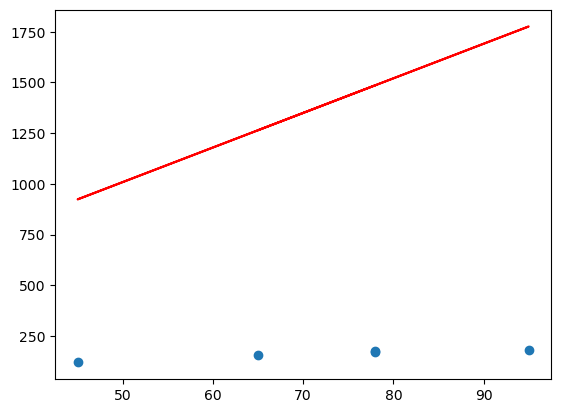

In [35]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')

## Performance metrics

## MSE, MAE, RMSE
## R square and adjusted R square

In [39]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [40]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

1571109.7376966465
1225.7843095186977
1253.4391639392184


# R square

Formula

R^2 = 1-SSR/SST
R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares

In [41]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)

In [42]:
score

-3190.755521080462

# Adjusted R Square

Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]
where:

    R2: The R2 of the model
    n: The number of observations
    k: The number of predictor variables

In [44]:
# display adjusted R-squared
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-4254.6740281072825

In [45]:
regressor


LinearRegression()

In [46]:
# new data point weight is 80

scaled_weight=scaler.transform([[80]])
scaled_weight

array([[80.]])

In [52]:
scaled_weight[0]

array([80.])

In [54]:
print("The height prediction for weight 80 kg is: ",regressor.predict([scaled_weight[0]]))

The height prediction for weight 80 kg is:  [1520.25269753]


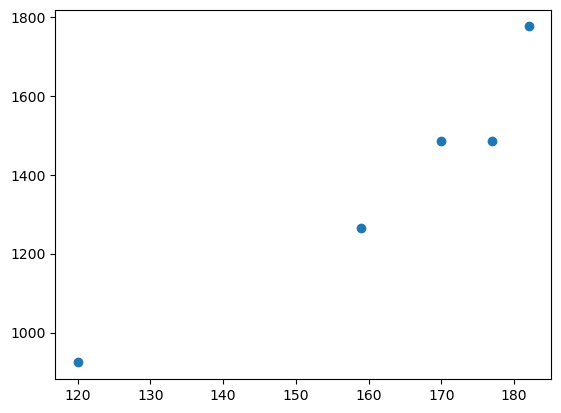

In [55]:
# Assumptions

# plot a scatter plot for the predicition
plt.scatter(y_test,y_pred_test) # linear graph shows the prediction is good

In [56]:
# Residuals
residuals=y_test-y_pred_test
residuals

15   -1309.183880
9    -1316.183880
0     -804.048392
8    -1593.768828
17   -1105.736567
Name: Height, dtype: float64

/Users/naresh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


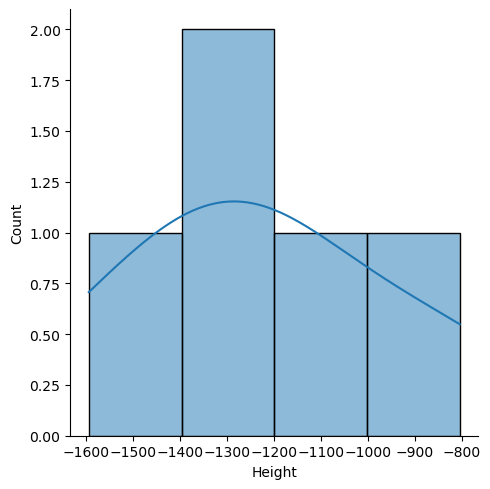

In [61]:
#plot this residuals
import seaborn as sns
sns.displot(residuals,kde=True) # if the curve is normal distributed then the model created is better

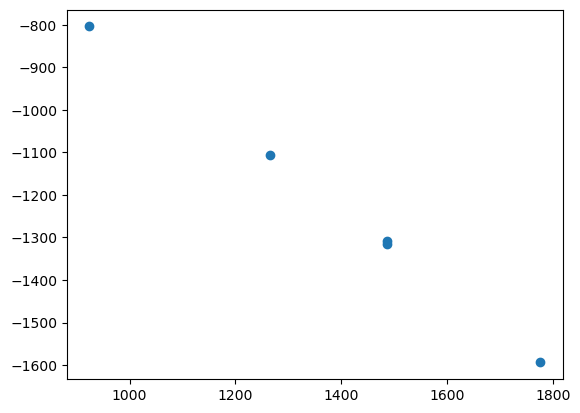

In [62]:
#Scatter plot with respect to prediction and residuals
# uniform distribution
plt.scatter(y_pred_test,residuals) # if the data points is uniformly distributed then the model is good